# **Final Capstone Project**
### Derek Blomquist

# Introduction

My research for this project revolves around policing and gun violence. Specifically, I will be looking through all the instances of people being shot and killed by police in the US since 2000 and determine how often the use of what I am calling excessive deadly force (EDF) occurs in these cases.

For the purpose of this analysis, I will be defining EDF as an event where someone is shot and killed by police while not being armed with a real gun.

To further dig into these occurrences, I will be testing several variables to determine whether certain groups experience EDF killings at a higher rate than the rate among all instances of police killings. The variables I will be testing are:


*   Race
  - Asian
  - Black
  - Hispanic
  - Native
  - White
*   Gender
  - Male
  - Female
*   Signs of mental illness
  - True
  - False

I will also examine occurrences of EDF based on age of the victim. 

In short, my research questions are:

*   Since 2000, how often have police shootings involved the use of excessive deadly force by US police offices?
*   Is there a significant difference in occurrence rates of excessive deadly force when compared by race, gender, or signs of mental illness?
*   Does age play a factor in EDF occurrences?

## The Data

For this project I will be analyzing two datasets from data.world:


*   US Police Involved Fatalities
*   Fatal Police Shootings

The US Police Involved Fatalities dataset contains all recorded instances of police shootings from 2000-2016, while the Fatal Police Shootings dataset is an active list of every person shot and killed by police from 2015 up to today.

First, I will load the data and import all the libraries I will need. Then, I will take a cursory look at the datasets to get an idea for what data types and columns are in the datasets.


In [18]:
# mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
# importing pandas, numpy, seaborn, hypothesis tests, and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats.distributions as dist
sns.set()

import warnings
warnings.filterwarnings("ignore")

# importing datasets as DataFrames returning the first five rows from the first dataset
df1 = pd.read_csv('/content/gdrive/My Drive/Final Capstone/Police_Fatalities_1.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/Final Capstone/Fatal_Police_Shootings.csv')
df1.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,2,John Edward Pittman,45.0,Male,Black,1/5/2000,Dothan,AL,Shot,NaN,False,False
1,4,Darryl Woodall Jr.,23.0,Male,NaN,1/6/2000,Charlotte,NC,Shot,NaN,False,False
2,5,Adrian Dolby,31.0,Male,NaN,1/6/2000,Muscoy,CA,Shot,NaN,False,False
3,8,Sonny Daniel Diaz,24.0,Male,NaN,1/9/2000,Moreno Valley,CA,Shot,Gun,False,False
4,9,Erin Forbes,26.0,Male,Black,1/10/2000,Bala Cywyd,PA,Shot,NaN,False,False


In [20]:
# returning first five rows of second dataset
df2.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UID              12491 non-null  int64  
 1   Name             12491 non-null  object 
 2   Age              12258 non-null  float64
 3   Gender           12483 non-null  object 
 4   Race             8526 non-null   object 
 5   Date             12491 non-null  object 
 6   City             12487 non-null  object 
 7   State            12491 non-null  object 
 8   Manner_of_death  12491 non-null  object 
 9   Armed            6814 non-null   object 
 10  Mental_illness   12491 non-null  bool   
 11  Flee             12491 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 1000.4+ KB


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7139 entries, 0 to 7138
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7139 non-null   int64  
 1   name                     6809 non-null   object 
 2   date                     7139 non-null   object 
 3   manner_of_death          7139 non-null   object 
 4   armed                    6930 non-null   object 
 5   age                      6754 non-null   float64
 6   gender                   7134 non-null   object 
 7   race                     5941 non-null   object 
 8   city                     7139 non-null   object 
 9   state                    7139 non-null   object 
 10  signs_of_mental_illness  7139 non-null   bool   
 11  threat_level             7139 non-null   object 
 12  flee                     6535 non-null   object 
 13  body_camera              7139 non-null   bool   
 14  longitude               

As you can see, there are some differences between these two datasets, both in the columns and in some of the value formats. I will begin by cleaning the data in a way that standardizes it across both DataFrames, which will allow me to join the two sets into one comprehesive DataFrame and remove any duplicate occurrences in the 2015-2016 overlap between the two sets.

# Data Preparation

## Cleaning

The first thing I want to do is remove columns from each set that don't have a reasonable counterpart in the other set.italicized text

In [23]:
# removing unnecessary columns from df1
df1_clean = df1.drop(['UID', 'Flee'], axis=1)


In [24]:
# removing unnecessary columns from df2
df2_clean = df2.drop(['id', 'threat_level', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'], axis=1)

In [25]:
# checking columns
df1_clean.head()

,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness
0,John Edward Pittman,45.0,Male,Black,1/5/2000,Dothan,AL,Shot,NaN,False
1,Darryl Woodall Jr.,23.0,Male,NaN,1/6/2000,Charlotte,NC,Shot,NaN,False
2,Adrian Dolby,31.0,Male,NaN,1/6/2000,Muscoy,CA,Shot,NaN,False
3,Sonny Daniel Diaz,24.0,Male,NaN,1/9/2000,Moreno Valley,CA,Shot,Gun,False
4,Erin Forbes,26.0,Male,Black,1/10/2000,Bala Cywyd,PA,Shot,NaN,False


In [26]:
df2_clean.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness
0,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True
1,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False
2,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False
3,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True
4,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False


Now that the column labels are equivalent, I will standardize letter cases, abbreviations, and data typs in both sets.

In [27]:
### changing column labels and values in df1 and df2 for uniformity

# converting column labels to all lowercase  
df1_column = df1_clean.rename(str.lower, axis=1)

# matching data value formats
df2_clean['gender'] = df2_clean['gender'].replace(['M', 'F'],['Male', 'Female'])
df2_clean['race'] = df2_clean['race'].replace(['A', 'B', 'H', 'N', 'W', 'O'],['Asian', 'Black', 'Hispanic', 'Native', 'White', 'Other'])

# converting date values to datetime
df1_column['date'] = pd.to_datetime(df1_column['date'])
df2_clean['date'] = pd.to_datetime(df2_clean['date'])

# changing column names
df1_signs = df1_column.rename(columns={'mental_illness': 'signs_of_mental_illness'})

# converting null values to blank cells
df1_fill = df1_signs.fillna("")
df2_fill = df2_clean.fillna("")


In [28]:
# checking columns and values
df1_fill.head(10)

,name,age,gender,race,date,city,state,manner_of_death,armed,signs_of_mental_illness
0,John Edward Pittman,45.0,Male,Black,2000-01-05,Dothan,AL,Shot,,False
1,Darryl Woodall Jr.,23.0,Male,,2000-01-06,Charlotte,NC,Shot,,False
2,Adrian Dolby,31.0,Male,,2000-01-06,Muscoy,CA,Shot,,False
3,Sonny Daniel Diaz,24.0,Male,,2000-01-09,Moreno Valley,CA,Shot,Gun,False
4,Erin Forbes,26.0,Male,Black,2000-01-10,Bala Cywyd,PA,Shot,,False
5,Guido Paul Jean,17.0,Male,,2000-01-11,Tampa,FL,Shot,,False
6,Jorge Montelongo,,Male,,2000-01-12,Garland,TX,Shot,Knife,False
7,Donald Dean Compton,44.0,Male,White,2000-01-13,Phoenix,AZ,Shot,,False
8,Miguel Peralta Torres,41.0,Male,Hispanic,2000-01-14,Modesto,CA,Shot,,False
9,Jose Daniel Gonzalez,25.0,Male,Hispanic,2000-01-15,North Tustin,CA,Shot,,False


In [29]:
df2_fill.head(10)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness
0,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,True
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,True
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False
5,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,Male,White,Guthrie,OK,False
6,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,Male,Hispanic,Chandler,AZ,False
7,Brock Nichols,2015-01-06,shot,gun,35.0,Male,White,Assaria,KS,False
8,Autumn Steele,2015-01-06,shot,unarmed,34.0,Female,White,Burlington,IA,False
9,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,Male,Black,Knoxville,PA,False


Now I will check the values in the categorical columns and fix any formatting differences that would prevent the values from grouping later.

In [30]:
### checking columns for uniformity in values
df1_fill.manner_of_death.unique()

array(['Shot', 'Other', 'Tasered', 'Shot and Tasered'], dtype=object)

In [31]:
df2_fill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [32]:
# changing values in manner_of_death to all lowercase
df1_fill['manner_of_death'] = df1_fill['manner_of_death'].str.lower()
df2_fill['manner_of_death'] = df2_fill['manner_of_death'].str.lower()

In [33]:
df1_fill.armed.unique()

array(['', 'Gun', 'Knife', 'Unarmed', 'Toy weapon', 'Nail Gun',
       'Toy Weapon', 'Vehicle', 'Shovel', 'Hammer', 'Hatchet', 'Sword',
       'Machete', 'Box Cutter', 'Metal Object', 'Screwdriver',
       'Lawn Mower Blade', 'Flagpole', 'Guns And Explosives',
       'Cordless Drill', 'Crossbow', 'Metal Pole', 'Tasered',
       'Metal Pipe', 'Metal Hand Tool', 'Blunt Object', 'Metal Stick',
       'Sharp Object', 'Meat Cleaver', 'Carjack', 'Chain',
       "Contractor'S Level", 'Unknown Weapon', 'Stapler', 'Beer Bottle',
       'Bean-Bag Gun', 'Baseball Bat And Fireplace Poker',
       'Straight Edge Razor', 'Gun And Knife', 'Axe', 'Baseball Bat',
       'Brick', 'Hand Torch', 'Chain Saw', 'Garden Tool', 'Scissors',
       'Pole', 'Pick-Axe', 'Flashlight', 'Baton', 'Spear', 'Pitchfork',
       'Hatchet And Gun', 'Rock', 'Piece Of Wood', 'Bayonet', 'Pipe',
       'Glass Shard', 'Motorcycle', 'Metal Rake'], dtype=object)

In [34]:
df2_fill.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', '', 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'baton', 'spear',
       'chair', 'pitchfork', 'hatchet and gun', 'rock', 'piece of wood',
       'pipe', 'glass shard', 'motorcycle', 'pepper spray', 'metal rake',
       'crowbar', 'oar', 'm

In [35]:
df1_fill['armed'] = df1_fill['armed'].str.lower()
df2_fill['armed'] = df2_fill['armed'].str.lower()

In [36]:
df1_fill.gender.unique()

array(['Male', 'Female', ''], dtype=object)

In [37]:
df2_fill.gender.unique()

array(['Male', 'Female', ''], dtype=object)

In [38]:
# no changes needed for gender column

df1_fill.race.unique()

array(['Black', '', 'White', 'Hispanic', 'Asian', 'Native', 'Other'],
      dtype=object)

In [39]:
df2_fill.race.unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Other', '', 'Native'],
      dtype=object)

In [40]:
# no changes needed for race column

df1_fill.signs_of_mental_illness.unique()

array([False,  True])

In [41]:
df2_fill.signs_of_mental_illness.unique()

array([ True, False])

In [42]:
# no changes needed for signs_of_mental_illness column

Now that all the data has been standardized, I need to determine the specific row where the data starts to overlap and then remove the duplicate data.  

In [43]:
### find overlap

# searching seven day period in both df's to find where matching data begins
start_date = '2014-12-30'
end_date = '2015-01-05'

after_start = df1_fill['date'] >= start_date
before_end = df1_fill['date'] <= end_date
between_two_dates = after_start & before_end
filtered_dates = df1_fill.loc[between_two_dates]

filtered_dates

,name,age,gender,race,date,city,state,manner_of_death,armed,signs_of_mental_illness
9065,Jerame C. Reid,36.0,Male,Black,2014-12-30,Bridgeton,NJ,shot,,False
9066,Joseph Anthony Pacini,52.0,Male,White,2014-12-30,Drexel Hill,PA,shot,,True
9067,Robert Earl Lawrence,30.0,Male,White,2014-12-30,Dothan,AL,shot,,False
9068,Eric Tyrone Forbes,28.0,Male,Black,2014-12-31,Miami,FL,shot,,False
9069,Mayra Cornejo,34.0,Female,Hispanic,2014-12-31,Compton,CA,shot,gun,False
9070,Kaileb Cole Williams,20.0,Male,White,2014-12-31,Missoula,MT,shot,,False
9071,Ernest Lee Erwin,48.0,Male,White,2014-12-31,Olive Hill,KY,shot,,False
9072,Roberto Fausto Ornelas,18.0,Male,Hispanic,2015-01-01,Key Largo,FL,tasered,,True
9073,Tim Elliott,53.0,Male,Asian,2015-01-02,Shelton,WA,shot,,True
9074,Tim Elliot,53.0,Male,Asian,2015-01-02,Shelton,WA,shot,gun,True


In [44]:
after_start = df2_fill['date'] >= start_date
before_end = df2_fill['date'] <= end_date
between_two_dates = after_start & before_end
filtered_dates = df2_fill.loc[between_two_dates]

filtered_dates

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness
0,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,WA,True
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,OR,False
2,John Paul Quintero,2015-01-03,shot and tasered,unarmed,23.0,Male,Hispanic,Wichita,KS,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,CA,True
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,CO,False
5,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,Male,White,Guthrie,OK,False
6,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,Male,Hispanic,Chandler,AZ,False


Based on these rows, the data starts to overlap on the date '2015-01-02'. It is also at this point that the first data set appears to start listing double rows for each observation with slightly different details, likely due to an attempt to update the old data observations without deleting the old data. To keep it simple, I will remove every observation after '2015-01-01' from the df1 dataset to eliminate the overlap.

In [45]:
# removing overlapping data from df1
df1_final = df1_fill[~(df1_fill['date'] > '2015-01-01')]

# confirming last date in set is '2015-01-01'
df1_final.sort_values(by='date', ascending=False)


,name,age,gender,race,date,city,state,manner_of_death,armed,signs_of_mental_illness
9072,Roberto Fausto Ornelas,18.0,Male,Hispanic,2015-01-01,Key Largo,FL,tasered,,True
9071,Ernest Lee Erwin,48.0,Male,White,2014-12-31,Olive Hill,KY,shot,,False
9070,Kaileb Cole Williams,20.0,Male,White,2014-12-31,Missoula,MT,shot,,False
9069,Mayra Cornejo,34.0,Female,Hispanic,2014-12-31,Compton,CA,shot,gun,False
9068,Eric Tyrone Forbes,28.0,Male,Black,2014-12-31,Miami,FL,shot,,False
...,...,...,...,...,...,...,...,...,...,...
4,Erin Forbes,26.0,Male,Black,2000-01-10,Bala Cywyd,PA,shot,,False
3,Sonny Daniel Diaz,24.0,Male,,2000-01-09,Moreno Valley,CA,shot,gun,False
2,Adrian Dolby,31.0,Male,,2000-01-06,Muscoy,CA,shot,,False
1,Darryl Woodall Jr.,23.0,Male,,2000-01-06,Charlotte,NC,shot,,False


Now that the data has been cleaned and standardized, I can now merge both sets together into one comprehensive DataFrame.

In [46]:
# merging dataframes
frames = [df1_final, df2_fill]

df = pd.concat(frames, ignore_index=True)

df

,name,age,gender,race,date,city,state,manner_of_death,armed,signs_of_mental_illness
0,John Edward Pittman,45.0,Male,Black,2000-01-05,Dothan,AL,shot,,False
1,Darryl Woodall Jr.,23.0,Male,,2000-01-06,Charlotte,NC,shot,,False
2,Adrian Dolby,31.0,Male,,2000-01-06,Muscoy,CA,shot,,False
3,Sonny Daniel Diaz,24.0,Male,,2000-01-09,Moreno Valley,CA,shot,gun,False
4,Erin Forbes,26.0,Male,Black,2000-01-10,Bala Cywyd,PA,shot,,False
...,...,...,...,...,...,...,...,...,...,...
16207,Andrew Castellano,34.0,Male,,2022-02-24,Edgewood,NM,shot,gun,False
16208,,,Male,,2022-02-25,Belen,NM,shot,undetermined,False
16209,,,Male,,2022-02-25,Detroit,MI,shot,undetermined,False
16210,,,Male,,2022-02-26,Beasley,TX,shot,knife,False


In [47]:
# check for overlap
after_start = df['date'] >= start_date
before_end = df['date'] <= end_date
between_two_dates = after_start & before_end
filtered_dates = df.loc[between_two_dates]

filtered_dates

,name,age,gender,race,date,city,state,manner_of_death,armed,signs_of_mental_illness
9065,Jerame C. Reid,36.0,Male,Black,2014-12-30,Bridgeton,NJ,shot,,False
9066,Joseph Anthony Pacini,52.0,Male,White,2014-12-30,Drexel Hill,PA,shot,,True
9067,Robert Earl Lawrence,30.0,Male,White,2014-12-30,Dothan,AL,shot,,False
9068,Eric Tyrone Forbes,28.0,Male,Black,2014-12-31,Miami,FL,shot,,False
9069,Mayra Cornejo,34.0,Female,Hispanic,2014-12-31,Compton,CA,shot,gun,False
9070,Kaileb Cole Williams,20.0,Male,White,2014-12-31,Missoula,MT,shot,,False
9071,Ernest Lee Erwin,48.0,Male,White,2014-12-31,Olive Hill,KY,shot,,False
9072,Roberto Fausto Ornelas,18.0,Male,Hispanic,2015-01-01,Key Largo,FL,tasered,,True
9073,Tim Elliot,53.0,Male,Asian,2015-01-02,Shelton,WA,shot,gun,True
9074,Lewis Lee Lembke,47.0,Male,White,2015-01-02,Aloha,OR,shot,gun,False


The two datasets have now been cleaned, standardized, and merged into one central dataset spanning all entries from 2000-01-05 to the most recent entry, which at the time of this writing is 2022-02-27.

## Adding Columns

Before I can begin analysis I need to add some conditional columns to aid in analysis and hypothesis testing. The first column will be labeled ```edf``` and its values will denote whether the observation can be classified as excessive deadly force. The values in the column will be ```0``` and ```1```, acting like a boolean where ```0``` represents False and ```1``` represents True. I will also add a column labeled ```not_edf``` containing the values opposite of ```edf``` to aid in hypothesis testing. Finally, I will add a column labeled ```edf_yn``` that returns one of the strings ```'Yes'``` or ```'No'``` based on the values ```1``` or ```0```, respectively, in ```edf```. 

Remember, EDF is being defined as the victim being shot while not being armed with a real gun, so before I add columns, I need to identify values in the ```armed``` column with the word 'gun' and filter out any values not referring to a real gun.

In [48]:
# creating dataframe only containing rows where the 'armed' value contains the string 'gun' and return unique values
gun_type = df.loc[df['armed'].str.contains('gun', case=False)]
gun_type.armed.unique()

array(['gun', 'nail gun', 'guns and explosives', 'bb gun', 'bean-bag gun',
       'gun and knife', 'hatchet and gun', 'machete and gun',
       'gun and sword', 'gun and car', 'pellet gun', 'gun and vehicle',
       'vehicle and gun', 'bb gun and vehicle', 'gun and machete'],
      dtype=object)

Looking at the ```armed``` values containing the string ```'gun'```, I need to make sure the values ```'nail gun'```, ```'bb gun'```, ```'bean-bag gun'```, ```'pellet gun'```, and ```'bb gun and vehicle'``` aren't classified as guns within the ```edf``` column equation. Based on earlier analysis of the ```armed``` columns from the original datasets, I can't make a judgement regarding ```edf``` for entries where the ```armed``` value ```'undetermined'```, so I need to make sure that value will not test as true for ```edf```. 

In [49]:
# creating 'edf'  column, classifying 'armed' values to identify real guns
df['edf'] = (np.where
             ((df['manner_of_death'].isin(['shot', 'shot and tasered'])) &
              (~df['armed'].isin(['gun', 'guns and explosives', 'gun and knife',
                                  'hatchet and gun', 'machete and gun', 'gun and sword',
                                  'gun and car', 'gun and vehicle', 'vehicle and gun',
                                  'gun and machete', 'undetermined'])), 1, 0))

# creating 'not_edf' column
df['not_edf'] = np.where(df['edf']==0, 1, 0)

# creating 'edf_yn' column
df['edf_yn'] = np.where(df['edf']==1, 'Yes', 'No')

In [50]:
# checking twenty random rows in the middle of df to check for proper value relationships in new columns
df.iloc[9900:9920]

,name,age,gender,race,date,city,state,manner_of_death,armed,signs_of_mental_illness,edf,not_edf,edf_yn
9900,Noah Harpham,33.0,Male,White,2015-10-31,Colorado Springs,CO,shot,gun,False,0,1,No
9901,Bennie Lee Tignor,56.0,Male,Black,2015-10-31,Opelika,AL,shot,unarmed,False,1,0,Yes
9902,Luverne Roy Christensen,49.0,Male,White,2015-11-01,Hutchinson,MN,shot,gun,False,0,1,No
9903,Killian O'Quinn,20.0,Male,White,2015-11-01,Eureka,CA,shot,gun,False,0,1,No
9904,Jack Yantis,62.0,Male,White,2015-11-01,Council,ID,shot,gun,False,0,1,No
9905,James Covington,62.0,Male,Black,2015-11-02,Washington,DC,shot,gun,False,0,1,No
9906,Jeremy Mardis,6.0,Male,White,2015-11-03,Marksville,LA,shot,unarmed,False,1,0,Yes
9907,Joseph Tyndall,30.0,Male,White,2015-11-04,Springfield,MO,shot,gun,False,0,1,No
9908,John Allen,57.0,Male,Black,2015-11-04,Houston,TX,shot,gun,False,0,1,No
9909,Faisal Mohammad,18.0,Male,Other,2015-11-04,Merced,CA,shot,knife,False,1,0,Yes


In [51]:
# testing 'armed' values to verify correct classification
df.loc[df['armed'] == 'gun', 'edf'].sum()

0

In [52]:
df.loc[df['armed'] == 'gun and', 'edf'].sum()

0

In [53]:
df.loc[df['armed'] == 'bb gun', 'edf'].sum()

17

In [54]:
df.loc[df['armed'] == 'nail gun', 'edf'].sum()

1

The dataset is now ready for analysis.

# Hypothesis Testing

For each variable, I will determine the parameter of interest, state the null and alternative hypotheses and then use a two-sample z-test to determine whether to accept or reject the null hypothesis. The confidence interval for all tests will be 95%, meaning the significance level, or ```α```, will be 0.05.

In [55]:
α = 0.05

## Race

For this variable, the EDF proportion of the values ```'Asian```, ```'Black'```, ```'Hispanic'```, ```'Native'```, and ```'White'``` in column ```race``` will be tested against the entire dataset ```pop_count``` and its EDF proportion ```pop_edf```.

In [56]:
# copy of df without 'race' values "Other" and ""
race5 = ['Asian', 'Black', 'Hispanic', 'Native', 'White']
df_race = df[df.race.isin(race5)].copy()

In [57]:
# contingency table for 'race'
contingency_table_race = pd.crosstab(df_race.edf_yn, df_race.race, margins=True, margins_name="Total")
contingency_table_race

race,Asian,Black,Hispanic,Native,White,Total
edf_yn,,,,,,
No,81,1716,1039,82,2808,5726
Yes,156,1601,1326,97,2549,5729
Total,237,3317,2365,179,5357,11455


In [58]:
# 'race' contingency table with proportions
prop_table = pd.crosstab(df_race.edf_yn, df_race.race).apply(lambda r:r/r.sum(),axis=0)
prop_table

race,Asian,Black,Hispanic,Native,White
edf_yn,,,,,
No,0.341772,0.517335,0.439323,0.458101,0.524174
Yes,0.658228,0.482665,0.560677,0.541899,0.475826


In [59]:
df.edf_yn.value_counts()

Yes    8278
No     7934
Name: edf_yn, dtype: int64

In [60]:
df['edf_yn'].value_counts(normalize=True)

Yes    0.510609
No     0.489391
Name: edf_yn, dtype: float64

Based on these numbers, our best proportion estimate of how often excessive deadly force has been used by US police since 2000 is 0.510609, or just over 51% of the time. The EDF occurences for people identified in the dataset as Asian, Hispanic, or Native all seem to be at a higher proportion than the population, while the proportions for Black people and White people appear to be slightly lower. To verify this, I will perform hypothesis tests comparing each 'race' value to the population. 

In [61]:
# calculating Standard Deviation for population
pop_count = df['edf'].count()
pop_edf = df['edf'].sum()
pop_prop = (pop_edf)/(pop_count)
pop_variance = pop_prop * (1 - pop_prop)
pop_stdev = np.sqrt(pop_variance)

####***Asian***

Parameter of interest:


μ1 - μ2,

where μ1 is the proportion of police killings of Asian people in the dataset that involved excessive deadly force, and

where μ2 is the proportion of all police killings in the dataset that did not involve excessive deadly force



Hypotheses:

H0: μ1−μ2=0
  - Null: There is no significant difference between the mean value of ```edf``` where the value in ```race``` is ```'Asian'``` and the mean of ```edf``` in the population.

Ha: μ1−μ2≠0
  - Alternate: There is a significant difference between the mean value of ```edf``` where the value in ```race``` is ```'Asian'``` and the mean of ```edf``` in the population.

In [62]:
# calculating Standard Deviation
asian_edf = df['race'] == 'Asian'
asian_count = df.race.value_counts().Asian 
asian_prop = df.loc[asian_edf, 'edf'].mean()
asian_variance = asian_prop * (1 - asian_prop)
asian_stdev = np.sqrt((asian_variance))
print('The standard deviation is', asian_stdev)

# calculating Standard Error
standard_error = np.sqrt((((asian_variance/asian_count)+(pop_variance/pop_count))))
print('The standard error is', standard_error)

# calculating z-statistic
prop_diff = pop_prop - asian_prop
z_stat = prop_diff/standard_error
print('The z-statistic is', z_stat)

# calculating p-value
pvalue = 2*dist.norm.cdf(-np.abs(z_stat)) # two-tail
print('The p-value is', pvalue)

# confidence interval
ci = standard_error * 1.96
# lower limit
ci_lower = prop_diff - ci
# upper limit
ci_upper = prop_diff + ci

if pvalue < α:
  print('Reject the null that there is no significant difference between the two populations. The difference is significant at p = ',
        round(pvalue, 8), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')
else: print('Fail to reject the null that there is no significant difference between the two populations. The difference is not significant at p = ',
            round(pvalue, 8), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')

The standard deviation is 0.4743036454479796
The standard error is 0.031058472336339283
The z-statistic is -4.752919634471236
The p-value is 2.0050005886351704e-06
Reject the null that there is no significant difference between the two populations. The difference is significant at p =  2.01e-06 . The 95% confidence interval for the population difference is  -0.2085 - -0.0867 .


###***Black***

Parameter of interest:


μ1 - μ2,

where μ1 is the proportion of police killings of Black people in the dataset that involved excessive deadly force, and

where μ2 is the proportion of all police killings in the dataset that did not involve excessive deadly force



Hypotheses:

H0: μ1−μ2=0
  - Null: There is no significant difference between the mean value of ```edf``` where the value in ```race``` is ```'Black'``` and the mean of ```edf``` in the population.

Ha: μ1−μ2≠0
  - Alternate: There is a significant difference between the mean value of ```edf``` where the value in ```race``` is ```'Black'``` and the mean of ```edf``` in the population.

In [63]:
# calculating Standard Deviation
black_edf = df['race'] == 'Black'
black_count = df.race.value_counts().Black 
black_prop = df.loc[black_edf, 'edf'].mean()
black_variance = black_prop * (1 - black_prop)
black_stdev = np.sqrt((black_variance))
print('The standard deviation is', black_stdev)

# calculating Standard Error
standard_error = np.sqrt((((black_variance/black_count)+(pop_variance/pop_count))))
print('The standard error is', standard_error)

# calculating z-statistic
prop_diff = pop_prop - black_prop
z_stat = prop_diff/standard_error
print('The z-statistic is', z_stat)

# calculating p-value
pvalue = 2*dist.norm.cdf(-np.abs(z_stat)) # two-tail
print('The p-value is', pvalue)

# confidence interval
ci = standard_error * 1.96
# lower limit
ci_lower = prop_diff - ci
# upper limit
ci_upper = prop_diff + ci

if pvalue < α:
  print('Reject the null that there is no significant difference between the two populations. The difference is significant at p = ',
        round(pvalue, 8), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')
else: print('Fail to reject the null that there is no significant difference between the two populations. The difference is not significant at p = ',
            round(pvalue, 8), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')

The standard deviation is 0.499699409458505
The standard error is 0.009523258302387115
The z-statistic is 2.9343282983441736
The p-value is 0.0033427044015850254
Reject the null that there is no significant difference between the two populations. The difference is significant at p =  0.0033427 . The 95% confidence interval for the population difference is  0.0093 - 0.0466 .


###***Hispanic***

Parameter of interest:


μ1 - μ2,

where μ1 is the proportion of police killings of Hispanic people in the dataset that involved excessive deadly force, and

where μ2 is the proportion of all police killings in the dataset that did not involve excessive deadly force



Hypotheses:

H0: μ1−μ2=0
  - Null: There is no significant difference between the mean value of ```edf``` where the value in ```race``` is ```'Hispanic'``` and the mean of ```edf``` in the population.

Ha: μ1−μ2≠0
  - Alternate: There is a significant difference between the mean value of ```edf``` where the value in ```race``` is ```'Hispanic'``` and the mean of ```edf``` in the population.

In [64]:
# calculating Standard Deviation
hispanic_edf = df['race'] == 'Hispanic'
hispanic_count = df.race.value_counts().Hispanic 
hispanic_prop = df.loc[hispanic_edf, 'edf'].mean()
hispanic_variance = hispanic_prop * (1 - hispanic_prop)
hispanic_stdev = np.sqrt((hispanic_variance))
print('The standard deviation is', hispanic_stdev)

# calculating Standard Error
standard_error = np.sqrt((((hispanic_variance/hispanic_count)+(pop_variance/pop_count))))
print('The standard error is', standard_error)

# calculating z-statistic
prop_diff = pop_prop - hispanic_prop
z_stat = prop_diff/standard_error
print('The z-statistic is', z_stat)

# calculating p-value
pvalue = 2*dist.norm.cdf(-np.abs(z_stat)) # two-tail
print('The p-value is', pvalue)

# confidence interval
ci = standard_error * 1.96
# lower limit
ci_lower = prop_diff - ci
# upper limit
ci_upper = prop_diff + ci

if pvalue < α:
  print('Reject the null that there is no significant difference between the two populations. The difference is significant at p = ',
        round(pvalue, 8), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')
else: print('Fail to reject the null that there is no significant difference between the two populations. The difference is not significant at p = ',
            round(pvalue, 8), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')

The standard deviation is 0.49630470315227215
The standard error is 0.010934590014336946
The z-statistic is -4.578782339960907
The p-value is 4.676905571483719e-06
Reject the null that there is no significant difference between the two populations. The difference is significant at p =  4.68e-06 . The 95% confidence interval for the population difference is  -0.0715 - -0.0286 .


###***Native***

Parameter of interest:


μ1 - μ2,

where μ1 is the proportion of police killings of Native people in the dataset that involved excessive deadly force, and

where μ2 is the proportion of all police killings in the dataset that did not involve excessive deadly force



Hypotheses:

H0: μ1−μ2=0
  - Null: There is no significant difference between the mean value of ```edf``` where the value in ```race``` is ```'Native'``` and the mean of ```edf``` in the population.

Ha: μ1−μ2≠0
  - Alternate: There is a significant difference between the mean value of ```edf``` where the value in ```race``` is ```'Native'``` and the mean of ```edf``` in the population.

In [65]:
# calculating Standard Deviation
native_edf = df['race'] == 'Native'
native_count = df.race.value_counts().Native 
native_prop = df.loc[native_edf, 'edf'].mean()
native_variance = native_prop * (1 - native_prop)
native_stdev = np.sqrt((native_variance))
print('The standard deviation is', native_stdev)

# calculating Standard Error
standard_error = np.sqrt((((native_variance/native_count)+(pop_variance/pop_count))))
print('The standard error is', standard_error)

# calculating z-statistic
prop_diff = pop_prop - native_prop
z_stat = prop_diff/standard_error
print('The z-statistic is', z_stat)

# calculating p-value
pvalue = 2*dist.norm.cdf(-np.abs(z_stat)) # two-tail
print('The p-value is', pvalue)

# confidence interval
ci = standard_error * 1.96
# lower limit
ci_lower = prop_diff - ci
# upper limit
ci_upper = prop_diff + ci

if pvalue < α:
  print('Reject the null that there is no significant difference between the two populations. The difference is significant at p = ',
        round(pvalue, 8), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')
else: print('Fail to reject the null that there is no significant difference between the two populations. The difference is not significant at p = ',
            round(pvalue, 8), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')

The standard deviation is 0.49824134394420777
The standard error is 0.03744668426148391
The z-statistic is -0.8355884330129776
The p-value is 0.4033864782086184
Fail to reject the null that there is no significant difference between the two populations. The difference is not significant at p =  0.40338648 . The 95% confidence interval for the population difference is  -0.1047 - 0.0421 .


###***White***

####*Parameter of interest*


μ1 - μ2,

where μ1 is the proportion of police killings of White people in the dataset that involved excessive deadly force, and

where μ2 is the proportion of all police killings in the dataset that did not involve excessive deadly force



####*Hypotheses*

H0: μ1−μ2=0
  - Null: There is no significant difference between the mean value of ```edf``` where the value in ```race``` is ```'White'``` and the mean of ```edf``` in the population.

Ha: μ1−μ2≠0
  - Alternate: There is a significant difference between the mean value of ```edf``` where the value in ```race``` is ```'White'``` and the mean of ```edf``` in the population.

####*Two-sample z-test*

In [66]:
# calculating Standard Deviation
white_edf = df['race'] == 'White'
white_count = df.race.value_counts().White 
white_prop = df.loc[white_edf, 'edf'].mean()
white_variance = white_prop * (1 - white_prop)
white_stdev = np.sqrt((white_variance))
print('The standard deviation is', white_stdev)

# calculating Standard Error
standard_error = np.sqrt((((white_variance/white_count)+(pop_variance/pop_count))))
print('The standard error is', standard_error)

# calculating z-statistic
prop_diff = pop_prop - white_prop
z_stat = prop_diff/standard_error
print('The z-statistic is', z_stat)

# calculating p-value
pvalue = 2*dist.norm.cdf(-np.abs(z_stat)) # two-tail
print('The p-value is', pvalue)

# confidence interval
ci = standard_error * 1.96
# lower limit
ci_lower = prop_diff - ci
# upper limit
ci_upper = prop_diff + ci

if pvalue < α:
  print('Reject the null that there is no significant difference between the two populations. The difference is significant at p = ',
        round(pvalue, 8), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')
else: print('Fail to reject the null that there is no significant difference between the two populations. The difference is not significant at p = ',
            round(pvalue, 8), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')

The standard deviation is 0.4994152768878553
The standard error is 0.007872265035294363
The z-statistic is 4.418474598352037
The p-value is 9.939995993449263e-06
Reject the null that there is no significant difference between the two populations. The difference is significant at p =  9.94e-06 . The 95% confidence interval for the population difference is  0.0194 - 0.0502 .


### **Results**

The test results for values 'Asian', 'Black', 'Hispanic', and 'White' all allow us to reject the null hypothesis and indicate that there is a definite, consequential relationship, while the test for 'Native' failed to reject the null, in part due to the small sample size producing a large confidence interval.

Below is a bar chart illustrating the EDF proportions and confidence intervals of each 'race' value in comparison with each other.

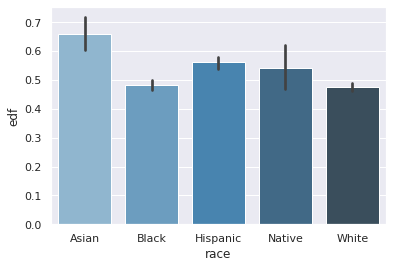

In [67]:
sns.set_theme(style='darkgrid')

order = 'Asian', 'Black', 'Hispanic', 'Native', 'White'
ax = sns.barplot(x='race', y='edf', data=df_race, order=order,
                 palette='Blues_d')

## Gender

For this variable, the EDF proportion of the values ```'Male'``` and ```'Female'``` in column ```gender``` will be tested against each other.

First, I need to create a copy of the DataFrame that excludes the blank values.

In [68]:
# copy of df without 'gender' value ""
gender2 = ['Male', 'Female']
df_gender = df[df.gender.isin(gender2)].copy()

In [69]:
# contingency table for 'gender'
contingency_table_gender = pd.crosstab(df_gender.edf_yn, df_gender.gender, margins=True, margins_name="Total")
contingency_table_gender

gender,Female,Male,Total
edf_yn,,,
No,302,7626,7928
Yes,478,7796,8274
Total,780,15422,16202


In [70]:
# 'gender' contingency table with proportions
prop_table = pd.crosstab(df_gender.edf_yn, df_gender.gender).apply(lambda r:r/r.sum(),axis=0)
prop_table

gender,Female,Male
edf_yn,,
No,0.387179,0.494488
Yes,0.612821,0.505512


This table indicates that a large portion of the dataset is made up of males, but females seem to experience ```edf``` in a larger proportion. Let's verify this and check for a statistically significant difference in proportions.

####*Parameter of interest*

μ1 - μ2,

where μ1 is the proportion of police killings of males in the dataset that involved excessive deadly force, and

where μ2 is the proportion of police killings of females in the dataset that involved excessive deadly force

####*Hypotheses*

H0: μ1−μ2=0

Null: There is no significant difference between the mean values of ```edf``` where the value in ```gender``` is ```'Male'``` and where the value in ```gender``` is ```'Female'```.

Ha: μ1−μ2≠0

Alternate: There is a significant difference between the mean value of ```edf``` where the value in ```gender``` is ```'Male'``` and where the value in ```gender``` is ```'Female'```.

####*Two-sample z-test*

In [71]:
## Male
# calculating Standard Deviation
male_edf = df['gender'] == 'Male'
male_count = df.gender.value_counts().Male 
male_prop = df.loc[male_edf, 'edf'].mean()
male_variance = male_prop * (1 - male_prop)
male_stdev = np.sqrt((male_variance))
print('The standard deviation for "Male" is', male_stdev)

## Female
# calculating Standard Deviation
female_edf = df['gender'] == 'Female'
female_count = df.gender.value_counts().Female 
female_prop = df.loc[female_edf, 'edf'].mean()
female_variance = female_prop * (1 - female_prop)
female_stdev = np.sqrt((female_variance))
print('The standard deviation for "Female" is', female_stdev)

# calculating Standard Error
standard_error = np.sqrt((((male_variance/male_count)+(female_variance/female_count))))
print('The standard error is', standard_error)

# calculating z-statistic
prop_diff = male_prop - female_prop
z_stat = prop_diff/standard_error
print('The z-statistic is', z_stat)

# calculating p-value
pvalue = 2*dist.norm.cdf(-np.abs(z_stat)) # two-tail
print('The p-value is', pvalue)

# confidence interval
ci = standard_error * 1.96
# lower limit
ci_lower = prop_diff - ci
# upper limit
ci_upper = prop_diff + ci

if pvalue < α:
  print('Reject the null that there is no significant difference between the two populations. The difference is significant at p = ',
        round(pvalue, 11), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')
else: print('Fail to reject the null that there is no significant between the two populations. The difference is not significant at p = ',
            round(pvalue, 11), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')

The standard deviation for "Male" is 0.4999696212676646
The standard deviation for "Female" is 0.48710525750284867
The standard error is 0.017899801957028512
The z-statistic is -5.994977278667046
The p-value is 2.0351389534296105e-09
Reject the null that there is no significant difference between the two populations. The difference is significant at p =  2.04e-09 . The 95% confidence interval for the population difference is  -0.1424 - -0.0722 .


### **Results**

This test indicates a significant difference in proportions, which means we reject the null hypothesis.

Below is a bar chart visualizing the difference in EDF proportion between males and females.

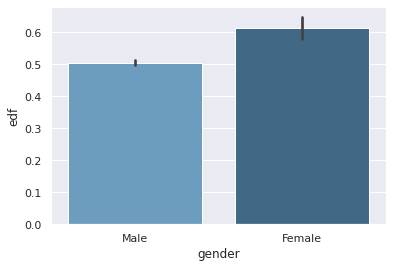

In [72]:
ax = sns.barplot(x='gender', y='edf', data=df_gender,
                 palette='Blues_d')

## Signs of mental illness

For this variable, the EDF proportion of the values ```'True'``` and ```'False'``` in column ```signs_of_mental_illness``` will be tested against each other.

In [73]:
# contingency table for 'signs_of_mental_illness'
contingency_table_signs = pd.crosstab(df.edf_yn, df.signs_of_mental_illness, margins=True, margins_name="Total")
contingency_table_signs

signs_of_mental_illness,False,True,Total
edf_yn,,,
No,6320,1614,7934
Yes,6447,1831,8278
Total,12767,3445,16212


In [74]:
# 'signs_of_mental_illness' contingency table with proportions
prop_table = pd.crosstab(df.edf_yn, df.signs_of_mental_illness).apply(lambda r:r/r.sum(),axis=0)
prop_table

signs_of_mental_illness,False,True
edf_yn,,
No,0.495026,0.468505
Yes,0.504974,0.531495


These tables indicate that people in the dataset who showed signs of mental illness experienced EDF in a higher proportion than those who didn't show signs of mental illness. We need to check to make sure the difference between the groups is significant enough to identify a consequential relationship between them.

####*Parameter of interest*

μ1 - μ2,

where μ1 is the proportion of police killings of people showing signs of mental illness that involved excessive deadly force, and

where μ2 is the proportion of police killings of people showing signs of mental illness that involved excessive deadly force

####*Hypotheses*

H0: μ1−μ2=0

Null: There is no significant difference between the mean values of ```edf``` where the value in ```signs_of_mental_illness``` is ```'True'``` and where the value in ````signs_of_mental_illness``` is ```'False'```.

Ha: μ1−μ2≠0

Alternate: There is a significant difference between the mean value of ```edf``` where the value in ```signs_of_mental_illness``` is ```'True'``` and where the value in ```signs_of_mental_illness``` is ```'False'```.

####*Two-sample z-test*

In [75]:
# creating copy of df to convert boolean to string
mask = df.applymap(type) != bool
d = {True: 'TRUE', False: 'FALSE'}
df_str = df.where(mask, df.replace(d))

## True
# calculating Standard Deviation
true_edf = df_str['signs_of_mental_illness'] == 'TRUE'
true_count = df_str.signs_of_mental_illness.value_counts().TRUE  
true_prop = df_str.loc[true_edf, 'edf'].mean()
true_variance = true_prop * (1 - true_prop)
true_stdev = np.sqrt((true_variance))
print('The standard deviation for "TRUE" is', true_stdev)

## False
# calculating Standard Deviation
false_edf = df_str['signs_of_mental_illness'] == 'FALSE'
false_count = df_str.signs_of_mental_illness.value_counts().FALSE  
false_prop = df_str.loc[false_edf, 'edf'].mean()
false_variance = false_prop * (1 - false_prop)
false_stdev = np.sqrt((false_variance))
print('The standard deviation for "FALSE" is', false_stdev)

# calculating Standard Error
standard_error = np.sqrt((((true_variance/true_count)+(false_variance/false_count))))
print('The standard error is', standard_error)

# calculating z-statistic
prop_diff = true_prop - false_prop
z_stat = prop_diff/standard_error
print('The z-statistic is', z_stat)

# calculating p-value
pvalue = 2*dist.norm.cdf(-np.abs(z_stat)) # two-tail
print('The p-value is', pvalue)

# confidence interval
ci = standard_error * 1.96
# lower limit
ci_lower = prop_diff - ci
# upper limit
ci_upper = prop_diff + ci

if pvalue < α:
  print('Reject the null that there is no significant difference between the two populations. The difference is significant at p = ',
        round(pvalue, 11), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')
else: print('Fail to reject the null that there is no significant difference between the two populations. The difference is not significant at p = ',
            round(pvalue, 11), '. The 95% confidence interval for the population difference is ', round(ci_lower, 4), '-', round(ci_upper, 4),'.')

The standard deviation for "TRUE" is 0.49900708412128075
The standard deviation for "FALSE" is 0.4999752610947117
The standard error is 0.009584404193348531
The z-statistic is 2.767116156927423
The p-value is 0.00565546005840649
Reject the null that there is no significant difference between the two populations. The difference is significant at p =  0.00565546006 . The 95% confidence interval for the population difference is  0.0077 - 0.0453 .


This test shows a significant difference between the proportions and rejects the null hypothesis.

Below is a bar chart containing the EDF proportion data and confidence intervals for the 'signs_of_mental_illness' values. 

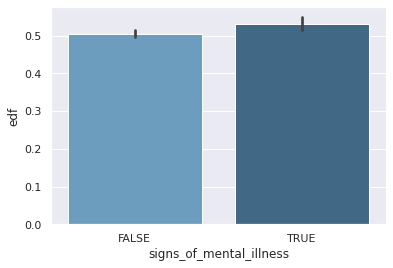

In [76]:
ax = sns.barplot(x='signs_of_mental_illness', y='edf', data=df_str,
                 palette='Blues_d')

# Age Analysis

Before I conclude, I wanted to use a few charts look at instances of EDF by age. 

This first histogram shows the overall age distribution in the dataset, while the second one depicts the distribution of EDF occurrences across the age range.

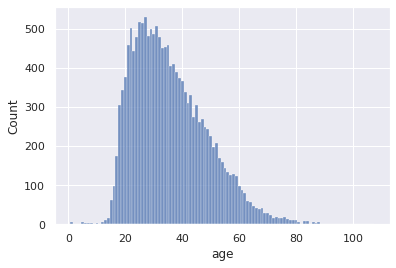

In [77]:
sns.histplot(x='age', data=df)

In [78]:
# copy of df with only EDF occurrences
edf2 = ['Yes']
df_edf = df[df.edf_yn.isin(edf2)].copy()

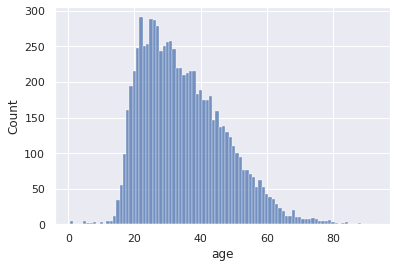

In [79]:
sns.histplot(x='age', data=df_edf)

These distributions appear very similar and seem indicate that no particular age range experiences a disproportionate amount of EDF relative to the others.

Next, I will create some boxplots to examine the age distribution by race, gender, and signs of mental illness.

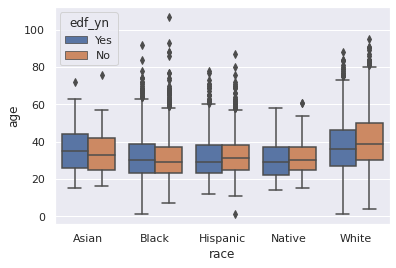

In [80]:
df_race['age'] = pd.to_numeric(df_race['age'], downcast='float')
ax = sns.boxplot(x='race', y='age', hue='edf_yn', data=df_race, order=['Asian', 'Black', 'Hispanic', 'Native', 'White'])

Here we can see that white people who are shot and killed by police are a couple years older than the other races on average, whether or not there is EDF involved.

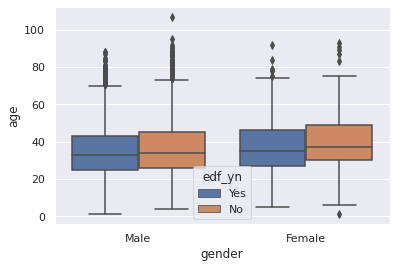

In [81]:
df_gender['age'] = pd.to_numeric(df_gender['age'], downcast='float')
ax = sns.boxplot(x='gender', y='age', hue='edf_yn', data=df_gender)

This chart indicates that women in the US are shot and killed by police at a slightly older average age than men, though it's not a huge difference.

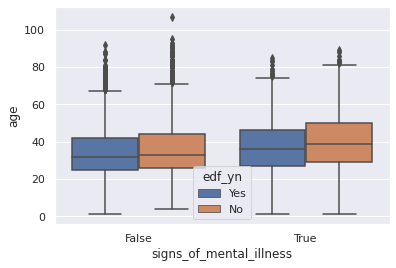

In [82]:
df['age'] = pd.to_numeric(df['age'], downcast='float')
ax = sns.boxplot(x='signs_of_mental_illness', y='age', hue='edf_yn', data=df)

The chart above is similar to the one prior in that one group ('True') is at a slightly higher average age than the other ('False') but probably not enough to draw anything from it.

# Conclusion

In summary:

 - I have identified two race groups (Asian and Hispanic) that experience excessive deadly force at the hands of US police at a proportionately higher rate than average.
 - The test on gender indicated that women are shot and killed without a gun by US police at a higher proportion than men.
 - Historically, it is more likely that someone exhibiting signs of mental illness, even without a gun, is more likely to be shot and killed by US police than a gunless individual who does not show signs of mental illness.
 - Age of the victim doesn't seem to make a difference in proportions.

Based on my findings, I would recommend that police departments
 - take steps to ensure that officers receive extensive training on use-of-force, as over half of the people shot and killed by US police since 2000 were not armed with a gun and therefore, less likely to be an immediate, instant threat
 - include required cultural and sensitivity training and testing for officers to help combat and eliminate bias, prejudice, and racism in the police force
 - start dispatching mental health professionals with officers on appropriate calls to counteract the EDF proportion rates of people who show signs of mental illness.
